In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

# Load MNIST dataset from local files
dataset_path = os.path.join(os.getcwd(),'mnist')
X_train_path = os.path.join(dataset_path,'train_x.npy')
Y_train_path = os.path.join(dataset_path,'train_y.npy')
X_test_path = os.path.join(dataset_path,'test_x.npy')
Y_test_path = os.path.join(dataset_path,'test_y.npy')

X_train = np.load(X_train_path)
y_train = np.load(Y_train_path)
X_test = np.load(X_test_path)
y_test = np.load(Y_test_path)
X_Validation = X_train[2000:]
y_Validation = y_train[2000:]
X_train = X_train[:10000]
y_train = y_train[:10000]

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


model = Sequential([
  Flatten(input_shape = (28,28)),
  Dense(16,activation='relu'),
  Dense(32,activation='relu'),
  Dense(64,activation='relu'),
  Dense(32,activation='relu'),
  Dense(16,activation='relu'),
  Dense(10,activation='softmax')
])



2026-02-23 15:10:36.363948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 15:10:36.364419: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 15:10:36.367694: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 15:10:36.375577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771837836.388625  220102 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771837836.39

Training data shape: (2574, 28, 28), Training labels shape: (2574,)
Test data shape: (644, 28, 28), Test labels shape: (644,)


/home/silicon/dip_ai/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-02-23 15:10:38.961916: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [2]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=32, validation_data=(X_Validation, y_Validation))

loss,accuracy = model.evaluate(X_train,y_train,verbose=1)


Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1225 - loss: 5.6803 - val_accuracy: 0.1760 - val_loss: 2.1971
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1830 - loss: 2.1850 - val_accuracy: 0.2474 - val_loss: 2.0261
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 2.0237 - val_accuracy: 0.3118 - val_loss: 1.8600
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 1.8393 - val_accuracy: 0.3519 - val_loss: 1.6620
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.6964 - val_accuracy: 0.4129 - val_loss: 1.5786
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4236 - loss: 1.5491 - val_accuracy: 0.4408 - val_loss: 1.5037
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4671 - loss: 1.4608 - val_accuracy: 0.5070 - val_loss: 1.3266
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 1.3254 - val_accuracy: 0.5192 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted digit: 3


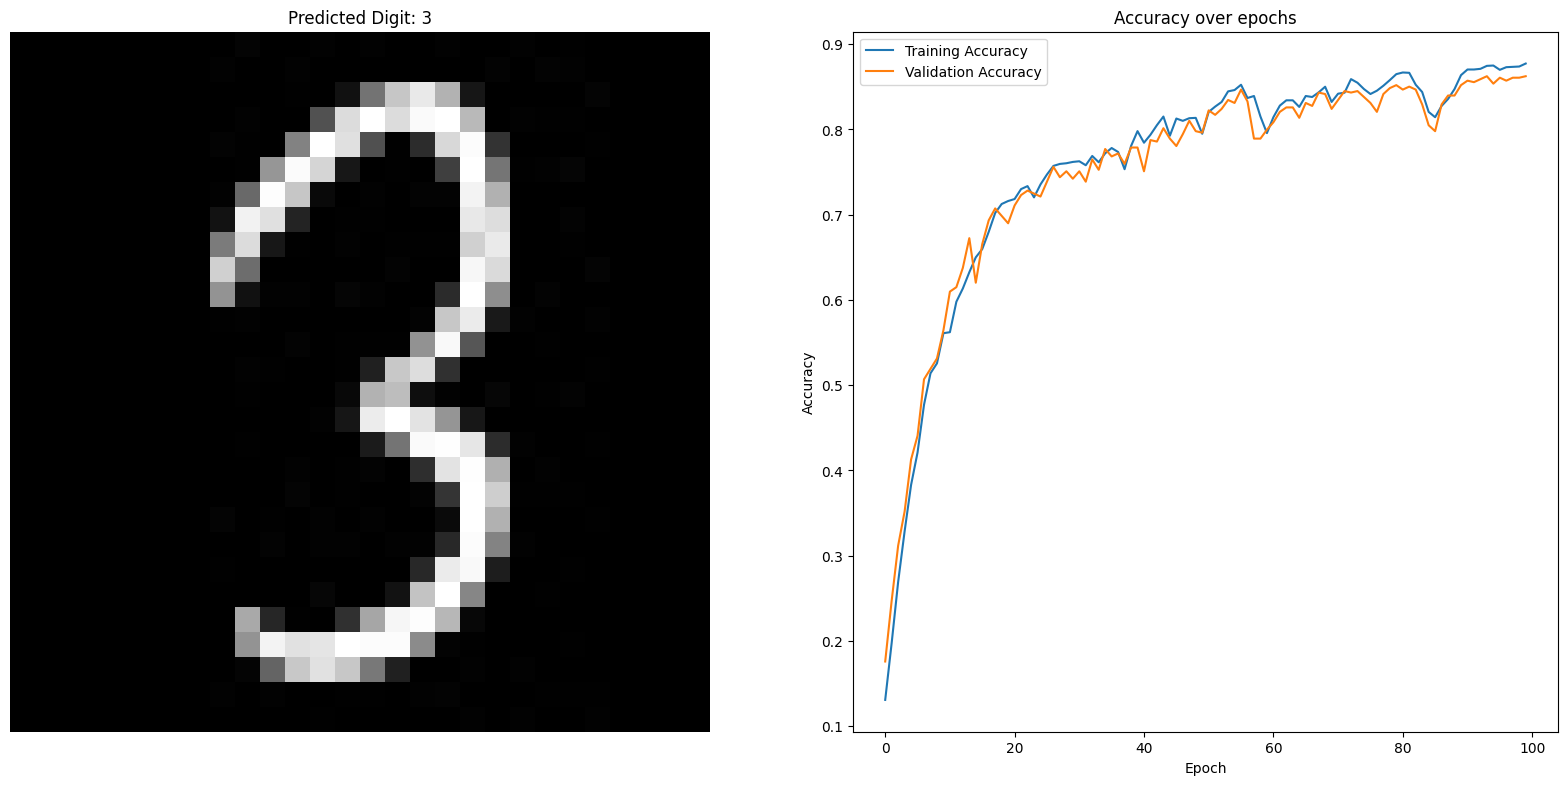

In [3]:

# visualize a sample

test_image = X_test[3] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()
